In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Historical Series Case Study LUISS.xlsx',sheet_name='IBM',engine='openpyxl',skiprows=range(1))
df = df[['Date','AdjClose','AdjClose.1','AdjClose.2']]

In [3]:
df.index = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.drop(['Date'],axis=1,inplace=True)

In [4]:
df.rename(columns={'AdjClose':'ADJ CLOSE','AdjClose.1':'ROLLING MEAN 10 DAYS','AdjClose.2':'ROLLING MEAN 50 DAYS'},inplace=True)
df

ADJ CLOSE  ROLLING MEAN 10 DAYS  ROLLING MEAN 50 DAYS
Date                                                              
1999-12-31   61.780476                   NaN                   NaN
2000-01-03   66.433693                   NaN                   NaN
2000-01-04   64.178642                   NaN                   NaN
2000-01-05   66.433693                   NaN                   NaN
2000-01-06   65.288307                   NaN                   NaN
...                ...                   ...                   ...
2022-02-07  135.606552            133.976187            128.115187
2022-02-08  135.389175            134.067093            128.534338
2022-02-09  136.149994            134.415891            128.915546
2022-02-10  133.520004            134.673618            129.271821
2022-02-11  132.690002            134.652702            129.615053

[5566 rows x 3 columns]

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


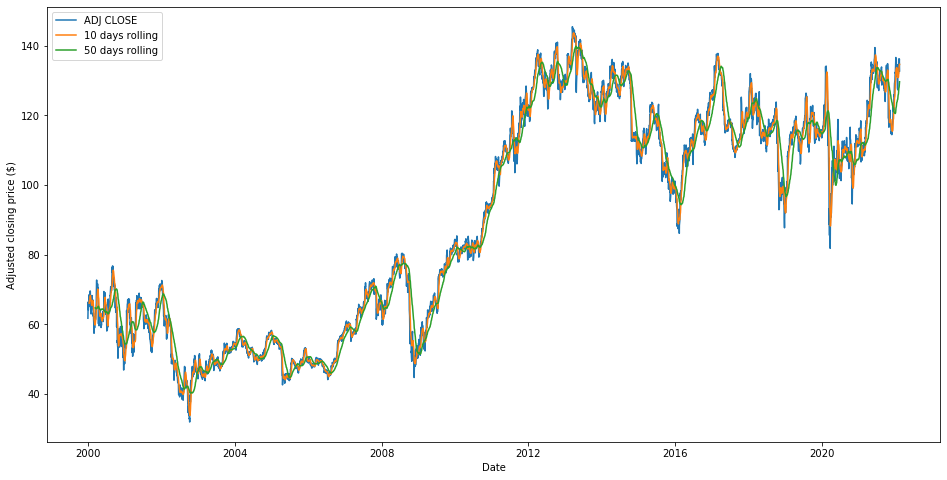

In [5]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df.index, df['ADJ CLOSE'], label='ADJ CLOSE')
ax.plot(df.index, df['ROLLING MEAN 10 DAYS'], label='10 days rolling')
ax.plot(df.index, df['ROLLING MEAN 50 DAYS'], label='50 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [6]:
df['ADJ CLOSE'].var()

995.1095185690625

In [7]:
df['ROLLING MEAN 10 DAYS'].var()

991.5868145174842

In [8]:
df['ROLLING MEAN 50 DAYS'].var()

979.3837388710583

In [9]:
df = df.iloc[49:,:]
df

ADJ CLOSE  ROLLING MEAN 10 DAYS  ROLLING MEAN 50 DAYS
Date                                                              
2000-03-13   61.737980             60.046734             64.788907
2000-03-14   62.275455             60.383548             64.798806
2000-03-15   61.343834             60.770531             64.697009
2000-03-16   62.490501             61.107354             64.663246
2000-03-17   63.063793             61.222018             64.595848
...                ...                   ...                   ...
2022-02-07  135.606552            133.976187            128.115187
2022-02-08  135.389175            134.067093            128.534338
2022-02-09  136.149994            134.415891            128.915546
2022-02-10  133.520004            134.673618            129.271821
2022-02-11  132.690002            134.652702            129.615053

[5517 rows x 3 columns]

In [10]:
q_70 = int(len(df.index) * .7)
df_train = df[:q_70]
df_test = df[q_70:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df_train)
df_scaled = scaler.transform(df_train)
df_scaled.shape

(3861, 3)

In [12]:
def Create_X_y(i):
    global X
    X=[]
    global y
    y=[]
    
    windowsize = [5,10,20,30,60]
    n_feature = 1 
    n_past = windowsize[i]
    
    for i in range(n_past,len(df_scaled)-n_feature+1):
        X.append(df_scaled[i-n_past:i, 0:df_scaled.shape[1]])
        y.append(df_scaled[i+n_feature-1:i+n_feature, 0]) 
    return X, y

In [13]:
Create_X_y(0)

([array([[0.26211977, 0.23842966, 0.24583147],
         [0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071]]),
  array([[0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043]]),
  array([[0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419]]),
  array([[0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625]]),
  array([[0.27381247, 0.24913593, 0.24389071],
     

In [14]:
X, y =np.array(X), np.array(y)
df_scaled.shape, X.shape, y.shape

((3861, 3), (3856, 5, 3), (3856, 1))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [16]:
model.fit(X, y, epochs=20, batch_size=64)

Train on 3856 samples
Epoch 1/20
3856/3856 [==============================] - 5s 1ms/sample - loss: 0.0196 - mean_absolute_error: 0.0828
Epoch 2/20
3856/3856 [==============================] - 2s 477us/sample - loss: 7.4410e-04 - mean_absolute_error: 0.0205
Epoch 3/20
3856/3856 [==============================] - 2s 450us/sample - loss: 6.9099e-04 - mean_absolute_error: 0.0197
Epoch 4/20
3856/3856 [==============================] - 2s 451us/sample - loss: 6.4646e-04 - mean_absolute_error: 0.0189
Epoch 5/20
3856/3856 [==============================] - 2s 451us/sample - loss: 6.0584e-04 - mean_absolute_error: 0.0182
Epoch 6/20
3856/3856 [==============================] - 2s 447us/sample - loss: 5.6106e-04 - mean_absolute_error: 0.0175
Epoch 7/20
3856/3856 [==============================] - 2s 451us/sample - loss: 5.0583e-04 - mean_absolute_error: 0.0165
Epoch 8/20
3856/3856 [==============================] - 2s 452us/sample - loss: 4.6930e-04 - mean_absolute_error: 0.0158
Epoch 9/20
3856/

In [17]:
dataset_total = pd.concat((df_train,df_test), axis=0)

In [18]:
inputs = dataset_total[len(dataset_total)-len(df_test)-5:].values

In [19]:
inputs.shape

(1661, 3)

In [20]:
inputs = scaler.transform(inputs)

In [21]:
inputs

array([[0.77951096, 0.75877919, 0.80091931],
       [0.77468382, 0.76243142, 0.80038257],
       [0.77418241, 0.76623257, 0.79979183],
       ...,
       [0.91837889, 0.91589722, 0.8904812 ],
       [0.89518432, 0.91824499, 0.89406275],
       [0.88786432, 0.91805446, 0.89751318]])

In [22]:
X_test = []
for i in range(5,len(inputs)):
    X_test.append(inputs[i-5:i, :]) #colonne tutte perchè è X , y solo il adj close

In [23]:
X_test

[array([[0.77951096, 0.75877919, 0.80091931],
        [0.77468382, 0.76243142, 0.80038257],
        [0.77418241, 0.76623257, 0.79979183],
        [0.78966705, 0.77044812, 0.79968035],
        [0.7991334 , 0.77525295, 0.80003194]]),
 array([[0.77468382, 0.76243142, 0.80038257],
        [0.77418241, 0.76623257, 0.79979183],
        [0.78966705, 0.77044812, 0.79968035],
        [0.7991334 , 0.77525295, 0.80003194],
        [0.80358482, 0.78075065, 0.80035065]]),
 array([[0.77418241, 0.76623257, 0.79979183],
        [0.78966705, 0.77044812, 0.79968035],
        [0.7991334 , 0.77525295, 0.80003194],
        [0.80358482, 0.78075065, 0.80035065],
        [0.73995245, 0.77950089, 0.79897719]]),
 array([[0.78966705, 0.77044812, 0.79968035],
        [0.7991334 , 0.77525295, 0.80003194],
        [0.80358482, 0.78075065, 0.80035065],
        [0.73995245, 0.77950089, 0.79897719],
        [0.72290046, 0.77768128, 0.79743793]]),
 array([[0.7991334 , 0.77525295, 0.80003194],
        [0.80358482, 0.780

In [24]:
X_test = np.array(X_test)

In [25]:
X_test.shape

(1656, 5, 3)

In [26]:
test_predictions5 = model.predict(X_test)

In [27]:
forecast_copies = np.repeat(test_predictions5, df_scaled.shape[1], axis=-1)
y_pre5 = scaler.inverse_transform(forecast_copies)[:,0]  #0 perchè la colonna dei adj close è questa
y_pre5

array([119.95571, 120.40987, 120.53042, ..., 134.345  , 134.42026,
       134.18555], dtype=float32)

In [28]:
y_test = df_test['ADJ CLOSE'].values

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


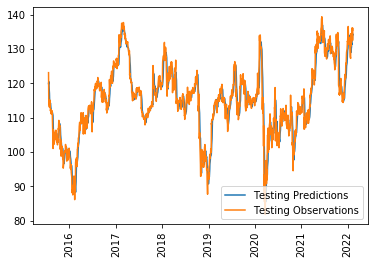

In [29]:
plt.plot(df_test.index, y_pre5)
plt.plot(df_test.index, y_test)
plt.xticks(rotation=90)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [30]:
test_results5 = pd.DataFrame(data={'Test Predictions':y_pre5, 'Actuals':y_test},index=df_test.index)
test_results5

Test Predictions     Actuals
Date                                    
2015-07-20        119.955711  123.133705
2015-07-21        120.409866  115.918549
2015-07-22        120.530418  113.985054
2015-07-23        120.127670  114.966019
2015-07-24        118.949051  113.558517
...                      ...         ...
2022-02-07        133.072205  135.606552
2022-02-08        133.926834  135.389175
2022-02-09        134.345001  136.149994
2022-02-10        134.420258  133.520004
2022-02-11        134.185547  132.690002

[1656 rows x 2 columns]

In [31]:
rmse5=np.sqrt(np.mean(((test_results5['Test Predictions']- test_results5['Actuals'])**2)))
mae5 = np.mean(np.abs(test_results5['Test Predictions']-test_results5['Actuals']))
MAPE5 = np.mean(np.abs(((test_results5['Test Predictions']-test_results5['Actuals'])/test_results5['Actuals'])*100))
from sklearn.metrics import r2_score
r2_5 = r2_score(test_results5['Actuals'], test_results5['Test Predictions'])
rmse5, mae5, MAPE5, r2_5

(2.8860618728066454, 2.029804188272227, 1.8015676994300651, 0.9228844480781672)

In [32]:
Create_X_y(1)

([array([[0.26211977, 0.23842966, 0.24583147],
         [0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625],
         [0.30035709, 0.26764342, 0.24293843],
         [0.32753383, 0.27567311, 0.24308259]]),
  array([[0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625],
         [0.30035709, 0.26764342, 0.24293843],
         [0.32753383, 0.27567311, 0.24308259],
         [0.35913439, 0.28569387, 0.24409108]]),
  array([[0.2586437 , 0.2450231 , 0.24490765],
         

In [33]:
X, y =np.array(X), np.array(y)
df_scaled.shape, X.shape, y.shape

((3861, 3), (3851, 10, 3), (3851, 1))

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [35]:
model.fit(X, y, epochs=20, batch_size=64)

Train on 3851 samples
Epoch 1/20
3851/3851 [==============================] - 6s 2ms/sample - loss: 0.0141 - mean_absolute_error: 0.0695
Epoch 2/20
3851/3851 [==============================] - 3s 826us/sample - loss: 9.0981e-04 - mean_absolute_error: 0.0226
Epoch 3/20
3851/3851 [==============================] - 3s 826us/sample - loss: 8.0601e-04 - mean_absolute_error: 0.0211
Epoch 4/20
3851/3851 [==============================] - 3s 835us/sample - loss: 7.1285e-04 - mean_absolute_error: 0.0197
Epoch 5/20
3851/3851 [==============================] - 3s 825us/sample - loss: 6.6720e-04 - mean_absolute_error: 0.0190
Epoch 6/20
3851/3851 [==============================] - 3s 842us/sample - loss: 6.0055e-04 - mean_absolute_error: 0.0180
Epoch 7/20
3851/3851 [==============================] - 3s 878us/sample - loss: 6.2848e-04 - mean_absolute_error: 0.0184
Epoch 8/20
3851/3851 [==============================] - 3s 873us/sample - loss: 5.7016e-04 - mean_absolute_error: 0.0175
Epoch 9/20
3851/

In [36]:
inputs = dataset_total[len(dataset_total)-len(df_test)-10:].values
inputs.shape

(1666, 3)

In [37]:
inputs = scaler.transform(inputs)
inputs

array([[0.75035952, 0.76300124, 0.80453802],
       [0.75205183, 0.76123342, 0.8040371 ],
       [0.74051678, 0.75769779, 0.80313847],
       ...,
       [0.91837889, 0.91589722, 0.8904812 ],
       [0.89518432, 0.91824499, 0.89406275],
       [0.88786432, 0.91805446, 0.89751318]])

In [38]:
X_test = []
for i in range(10,len(inputs)):
    X_test.append(inputs[i-10:i, :])

In [39]:
X_test = np.array(X_test)

In [40]:
test_predictions10 = model.predict(X_test)

In [41]:
forecast_copies = np.repeat(test_predictions10, df_scaled.shape[1], axis=-1)
y_pre10 = scaler.inverse_transform(forecast_copies)[:,0]  #0 perchè la colonna dei adj close è questa
y_pre10

array([118.73608 , 119.45441 , 119.623474, ..., 132.98773 , 133.36736 ,
       133.53673 ], dtype=float32)

In [42]:
y_test = df_test['ADJ CLOSE'].values

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


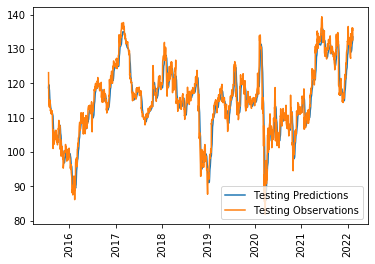

In [43]:
plt.plot(df_test.index, y_pre10)
plt.plot(df_test.index, y_test)
plt.xticks(rotation=90)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [44]:
test_results10 = pd.DataFrame(data={'Test Predictions':y_pre10, 'Actuals':y_test},index=df_test.index)
test_results10

Test Predictions     Actuals
Date                                    
2015-07-20        118.736076  123.133705
2015-07-21        119.454407  115.918549
2015-07-22        119.623474  113.985054
2015-07-23        119.356247  114.966019
2015-07-24        118.834221  113.558517
...                      ...         ...
2022-02-07        132.018051  135.606552
2022-02-08        132.644287  135.389175
2022-02-09        132.987732  136.149994
2022-02-10        133.367355  133.520004
2022-02-11        133.536728  132.690002

[1656 rows x 2 columns]

In [45]:
rmse10=np.sqrt(np.mean(((test_results10['Test Predictions']- test_results10['Actuals'])**2)))
mae10 = np.mean(np.abs(test_results10['Test Predictions']-test_results10['Actuals']))
MAPE10 = np.mean(np.abs(((test_results10['Test Predictions']-test_results10['Actuals'])/test_results10['Actuals'])*100))
r2_10 = r2_score(test_results10['Actuals'], test_results10['Test Predictions'])
rmse10, mae10, MAPE10, r2_10

(3.2275956395782037, 2.347868472481695, 2.075672736448451, 0.9035529526937384)

In [46]:
Create_X_y(2)

([array([[0.26211977, 0.23842966, 0.24583147],
         [0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625],
         [0.30035709, 0.26764342, 0.24293843],
         [0.32753383, 0.27567311, 0.24308259],
         [0.35913439, 0.28569387, 0.24409108],
         [0.33701404, 0.29294017, 0.24443697],
         [0.31931744, 0.29920724, 0.24482561],
         [0.33827813, 0.30638821, 0.24521471],
         [0.31615731, 0.31076206, 0.24515709],
         [0.33448585, 0.31559292, 0.24522945],
         [0.33037806, 0.31960774, 0.24520817],
         [0.34965438, 0.32522197, 0.2458998 ],
         [0.33827813, 0.32913888, 0.24660554],
         [0.34017417, 0.33044452, 0.24772873]]),
  array([[0.26685991, 0.24149787, 0.24593099],
         [0

In [47]:
X, y =np.array(X), np.array(y)
df_scaled.shape, X.shape, y.shape

((3861, 3), (3841, 20, 3), (3841, 1))

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [49]:
model.fit(X, y, epochs=20, batch_size=64)

Train on 3841 samples
Epoch 1/20
3841/3841 [==============================] - 10s 2ms/sample - loss: 0.0212 - mean_absolute_error: 0.0835
Epoch 2/20
3841/3841 [==============================] - 6s 2ms/sample - loss: 0.0011 - mean_absolute_error: 0.0244
Epoch 3/20
3841/3841 [==============================] - 6s 2ms/sample - loss: 9.0933e-04 - mean_absolute_error: 0.0225
Epoch 4/20
3841/3841 [==============================] - 6s 2ms/sample - loss: 8.3739e-04 - mean_absolute_error: 0.0217
Epoch 5/20
3841/3841 [==============================] - 6s 2ms/sample - loss: 7.8432e-04 - mean_absolute_error: 0.0208
Epoch 6/20
3841/3841 [==============================] - 6s 2ms/sample - loss: 7.1513e-04 - mean_absolute_error: 0.0198
Epoch 7/20
3841/3841 [==============================] - 7s 2ms/sample - loss: 6.5386e-04 - mean_absolute_error: 0.0188
Epoch 8/20
3841/3841 [==============================] - 7s 2ms/sample - loss: 9.2457e-04 - mean_absolute_error: 0.0220
Epoch 9/20
3841/3841 [===========

In [50]:
inputs = dataset_total[len(dataset_total)-len(df_test)-20:].values
inputs.shape

(1676, 3)

In [51]:
inputs = scaler.transform(inputs)

In [52]:
X_test = []
for i in range(20,len(inputs)):
    X_test.append(inputs[i-20:i, :])

In [53]:
X_test = np.array(X_test)

In [54]:
test_predictions20 = model.predict(X_test)

In [55]:
forecast_copies = np.repeat(test_predictions20, df_scaled.shape[1], axis=-1)
y_pre20 = scaler.inverse_transform(forecast_copies)[:,0]  #0 perchè la colonna dei adj close è questa
y_pre20

array([118.89673, 119.59905, 119.72419, ..., 132.40321, 132.79129,
       132.8996 ], dtype=float32)

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


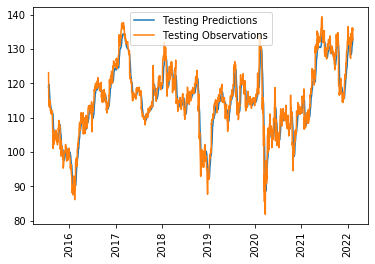

In [56]:
plt.plot(df_test.index, y_pre20)
plt.plot(df_test.index, y_test)
plt.xticks(rotation=90)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [57]:
test_results20 = pd.DataFrame(data={'Test Predictions':y_pre20, 'Actuals':y_test},index=df_test.index)
test_results20

Test Predictions     Actuals
Date                                    
2015-07-20        118.896729  123.133705
2015-07-21        119.599052  115.918549
2015-07-22        119.724190  113.985054
2015-07-23        119.357948  114.966019
2015-07-24        118.759598  113.558517
...                      ...         ...
2022-02-07        131.381653  135.606552
2022-02-08        131.952881  135.389175
2022-02-09        132.403214  136.149994
2022-02-10        132.791290  133.520004
2022-02-11        132.899597  132.690002

[1656 rows x 2 columns]

In [58]:
rmse20=np.sqrt(np.mean(((test_results20['Test Predictions']- test_results20['Actuals'])**2)))
mae20 = np.mean(np.abs(test_results20['Test Predictions']-test_results20['Actuals']))
MAPE20 = np.mean(np.abs(((test_results20['Test Predictions']-test_results20['Actuals'])/test_results20['Actuals'])*100))
r2_20 = r2_score(test_results20['Actuals'], test_results20['Test Predictions'])
rmse20, mae20, MAPE20, r2_20

(3.210209160647654, 2.347489757814269, 2.069060842751884, 0.9045892399065051)

In [59]:
Create_X_y(3)

([array([[0.26211977, 0.23842966, 0.24583147],
         [0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625],
         [0.30035709, 0.26764342, 0.24293843],
         [0.32753383, 0.27567311, 0.24308259],
         [0.35913439, 0.28569387, 0.24409108],
         [0.33701404, 0.29294017, 0.24443697],
         [0.31931744, 0.29920724, 0.24482561],
         [0.33827813, 0.30638821, 0.24521471],
         [0.31615731, 0.31076206, 0.24515709],
         [0.33448585, 0.31559292, 0.24522945],
         [0.33037806, 0.31960774, 0.24520817],
         [0.34965438, 0.32522197, 0.2458998 ],
         [0.33827813, 0.32913888, 0.24660554],
         [0.34017417, 0.33044452, 0.24772873],
         [0.33511806, 0.32796384, 0.24895976],
         [0.3

In [60]:
X, y =np.array(X), np.array(y)
df_scaled.shape, X.shape, y.shape

((3861, 3), (3831, 30, 3), (3831, 1))

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [62]:
model.fit(X, y, epochs=20, batch_size=64)

Train on 3831 samples
Epoch 1/20
3831/3831 [==============================] - 13s 3ms/sample - loss: 0.0155 - mean_absolute_error: 0.0671
Epoch 2/20
3831/3831 [==============================] - 10s 3ms/sample - loss: 0.0011 - mean_absolute_error: 0.0243
Epoch 3/20
3831/3831 [==============================] - 9s 2ms/sample - loss: 9.0803e-04 - mean_absolute_error: 0.0225
Epoch 4/20
3831/3831 [==============================] - 9s 2ms/sample - loss: 7.8199e-04 - mean_absolute_error: 0.0208
Epoch 5/20
3831/3831 [==============================] - 11s 3ms/sample - loss: 6.8609e-04 - mean_absolute_error: 0.0192
Epoch 6/20
3831/3831 [==============================] - 10s 3ms/sample - loss: 6.3922e-04 - mean_absolute_error: 0.0186
Epoch 7/20
3831/3831 [==============================] - 11s 3ms/sample - loss: 6.1219e-04 - mean_absolute_error: 0.0180
Epoch 8/20
3831/3831 [==============================] - 11s 3ms/sample - loss: 6.1005e-04 - mean_absolute_error: 0.0181
Epoch 9/20
3831/3831 [======

In [63]:
inputs = dataset_total[len(dataset_total)-len(df_test)-30:].values
inputs.shape

(1686, 3)

In [64]:
inputs = scaler.transform(inputs)

In [65]:
X_test = []
for i in range(30,len(inputs)):
    X_test.append(inputs[i-30:i, :])

In [66]:
X_test = np.array(X_test)

In [67]:
test_predictions30 = model.predict(X_test)

In [68]:
forecast_copies = np.repeat(test_predictions30, df_scaled.shape[1], axis=-1)
y_pre30 = scaler.inverse_transform(forecast_copies)[:,0]  #0 perchè la colonna dei adj close è questa
y_pre30

array([121.729774, 122.60084 , 122.24004 , ..., 135.88037 , 136.14249 ,
       135.90689 ], dtype=float32)

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


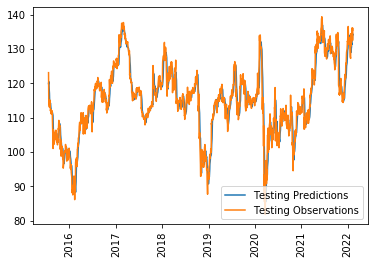

In [69]:
plt.plot(df_test.index, y_pre5)
plt.plot(df_test.index, y_test)
plt.xticks(rotation=90)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [70]:
test_results30 = pd.DataFrame(data={'Test Predictions':y_pre30, 'Actuals':y_test},index=df_test.index)
test_results30

Test Predictions     Actuals
Date                                    
2015-07-20        121.729774  123.133705
2015-07-21        122.600838  115.918549
2015-07-22        122.240044  113.985054
2015-07-23        121.087357  114.966019
2015-07-24        119.856819  113.558517
...                      ...         ...
2022-02-07        135.018387  135.606552
2022-02-08        135.568039  135.389175
2022-02-09        135.880371  136.149994
2022-02-10        136.142487  133.520004
2022-02-11        135.906891  132.690002

[1656 rows x 2 columns]

In [71]:
rmse30=np.sqrt(np.mean(((test_results30['Test Predictions']- test_results30['Actuals'])**2)))
mae30 = np.mean(np.abs(test_results30['Test Predictions']-test_results30['Actuals']))
MAPE30 = np.mean(np.abs(((test_results30['Test Predictions']-test_results30['Actuals'])/test_results30['Actuals'])*100))
r2_30 = r2_score(test_results30['Actuals'], test_results30['Test Predictions'])
rmse30, mae30, MAPE30, r2_30

(2.883779181485325, 2.096234519700497, 1.8792088792567918, 0.9230063868266796)

In [72]:
Create_X_y(4)

([array([[0.26211977, 0.23842966, 0.24583147],
         [0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625],
         [0.30035709, 0.26764342, 0.24293843],
         [0.32753383, 0.27567311, 0.24308259],
         [0.35913439, 0.28569387, 0.24409108],
         [0.33701404, 0.29294017, 0.24443697],
         [0.31931744, 0.29920724, 0.24482561],
         [0.33827813, 0.30638821, 0.24521471],
         [0.31615731, 0.31076206, 0.24515709],
         [0.33448585, 0.31559292, 0.24522945],
         [0.33037806, 0.31960774, 0.24520817],
         [0.34965438, 0.32522197, 0.2458998 ],
         [0.33827813, 0.32913888, 0.24660554],
         [0.34017417, 0.33044452, 0.24772873],
         [0.33511806, 0.32796384, 0.24895976],
         [0.3

In [73]:
X, y =np.array(X), np.array(y)
df_scaled.shape, X.shape, y.shape

((3861, 3), (3801, 60, 3), (3801, 1))

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [75]:
model.fit(X, y, epochs=20, batch_size=64)

Train on 3801 samples
Epoch 1/20
3801/3801 [==============================] - 21s 6ms/sample - loss: 0.0192 - mean_absolute_error: 0.0724
Epoch 2/20
3801/3801 [==============================] - 19s 5ms/sample - loss: 8.3926e-04 - mean_absolute_error: 0.0214
Epoch 3/20
3801/3801 [==============================] - 27s 7ms/sample - loss: 7.6955e-04 - mean_absolute_error: 0.0205
Epoch 4/20
3801/3801 [==============================] - 23s 6ms/sample - loss: 7.4275e-04 - mean_absolute_error: 0.0201
Epoch 5/20
3801/3801 [==============================] - 24s 6ms/sample - loss: 6.7175e-04 - mean_absolute_error: 0.0190
Epoch 6/20
3801/3801 [==============================] - 27s 7ms/sample - loss: 6.5937e-04 - mean_absolute_error: 0.0188
Epoch 7/20
3801/3801 [==============================] - 24s 6ms/sample - loss: 6.6105e-04 - mean_absolute_error: 0.0188
Epoch 8/20
3801/3801 [==============================] - 22s 6ms/sample - loss: 6.2598e-04 - mean_absolute_error: 0.0183
Epoch 9/20
3801/3801 [

In [76]:
inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values

In [77]:
inputs = scaler.transform(inputs)

In [78]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i, :])

In [79]:
X_test = np.array(X_test)

In [80]:
test_predictions60 = model.predict(X_test)

In [81]:
forecast_copies = np.repeat(test_predictions60, df_scaled.shape[1], axis=-1)
y_pre60 = scaler.inverse_transform(forecast_copies)[:,0]  #0 perchè la colonna dei adj close è questa
y_pre60

array([120.540924, 121.4622  , 121.43659 , ..., 134.89503 , 135.2572  ,
       135.16843 ], dtype=float32)

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


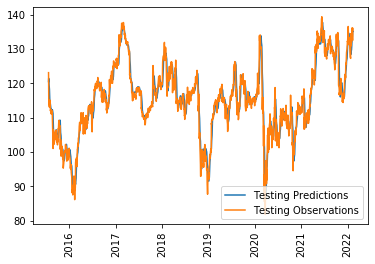

In [82]:
plt.plot(df_test.index, y_pre60)
plt.plot(df_test.index, y_test)
plt.xticks(rotation=90)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [83]:
test_results60 = pd.DataFrame(data={'Test Predictions':y_pre60, 'Actuals':y_test},index=df_test.index)
test_results60

Test Predictions     Actuals
Date                                    
2015-07-20        120.540924  123.133705
2015-07-21        121.462196  115.918549
2015-07-22        121.436592  113.985054
2015-07-23        120.659645  114.966019
2015-07-24        119.607002  113.558517
...                      ...         ...
2022-02-07        133.720673  135.606552
2022-02-08        134.420197  135.389175
2022-02-09        134.895035  136.149994
2022-02-10        135.257202  133.520004
2022-02-11        135.168427  132.690002

[1656 rows x 2 columns]

In [84]:
rmse60=np.sqrt(np.mean(((test_results60['Test Predictions']- test_results60['Actuals'])**2)))
mae60 = np.mean(np.abs(test_results60['Test Predictions']-test_results60['Actuals']))
MAPE60 = np.mean(np.abs(((test_results60['Test Predictions']-test_results60['Actuals'])/test_results60['Actuals'])*100))
r2_60 = r2_score(test_results60['Actuals'], test_results60['Test Predictions'])
rmse60, mae60, MAPE60, r2_60

(2.777194610445542, 1.981115212187099, 1.766150027039157, 0.928592582990248)

In [85]:
index_bar = [5,10,20,30,60]

rmse = [rmse5,rmse10,rmse20,rmse30,rmse60]
mae = [mae5,mae10,mae20,mae30,mae60]
MAPE = [MAPE5,MAPE10,MAPE20,MAPE30,MAPE60]
r2 = [r2_5,r2_10,r2_20,r2_30,r2_60]

df_bar = pd.DataFrame(data={'rmse':rmse, 'mae':mae, 'MAPE':MAPE, 'r2':r2},index=index_bar)
df_bar

rmse       mae      MAPE        r2
5   2.886062  2.029804  1.801568  0.922884
10  3.227596  2.347868  2.075673  0.903553
20  3.210209  2.347490  2.069061  0.904589
30  2.883779  2.096235  1.879209  0.923006
60  2.777195  1.981115  1.766150  0.928593

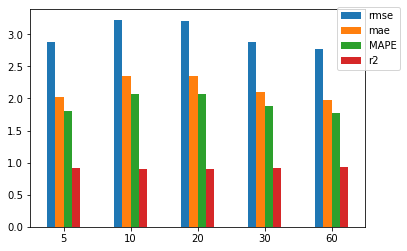

In [86]:
ax = df_bar.plot.bar(rot=0)
ax.legend(loc='best', bbox_to_anchor=(0.9, 0.7))
plt.savefig('Daily TRE COLUMNS PERFORMANCE MATRICS BUONO.png')

In [87]:
## SCELGO 5 GIORNI

In [88]:
Create_X_y(0)

([array([[0.26211977, 0.23842966, 0.24583147],
         [0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071]]),
  array([[0.26685991, 0.24149787, 0.24593099],
         [0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043]]),
  array([[0.2586437 , 0.2450231 , 0.24490765],
         [0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419]]),
  array([[0.26875646, 0.24809139, 0.24456824],
         [0.27381247, 0.24913593, 0.24389071],
         [0.28771654, 0.25419528, 0.24376043],
         [0.2915091 , 0.25967899, 0.24377419],
         [0.29530098, 0.26385706, 0.24335625]]),
  array([[0.27381247, 0.24913593, 0.24389071],
     

In [89]:
X, y =np.array(X), np.array(y)
df_scaled.shape, X.shape, y.shape

((3861, 3), (3856, 5, 3), (3856, 1))

In [90]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [91]:
model.fit(X, y, epochs=30, batch_size=64)

Train on 3856 samples
Epoch 1/30
3856/3856 [==============================] - 6s 1ms/sample - loss: 0.0129 - mean_absolute_error: 0.0671
Epoch 2/30
3856/3856 [==============================] - 2s 462us/sample - loss: 5.4734e-04 - mean_absolute_error: 0.0173
Epoch 3/30
3856/3856 [==============================] - 2s 457us/sample - loss: 4.9669e-04 - mean_absolute_error: 0.0163
Epoch 4/30
3856/3856 [==============================] - 2s 451us/sample - loss: 4.6380e-04 - mean_absolute_error: 0.0158
Epoch 5/30
3856/3856 [==============================] - 2s 460us/sample - loss: 4.2864e-04 - mean_absolute_error: 0.0150
Epoch 6/30
3856/3856 [==============================] - 2s 470us/sample - loss: 3.9835e-04 - mean_absolute_error: 0.0144
Epoch 7/30
3856/3856 [==============================] - 2s 482us/sample - loss: 3.8742e-04 - mean_absolute_error: 0.0142
Epoch 8/30
3856/3856 [==============================] - 2s 460us/sample - loss: 3.5345e-04 - mean_absolute_error: 0.0135
Epoch 9/30
3856/

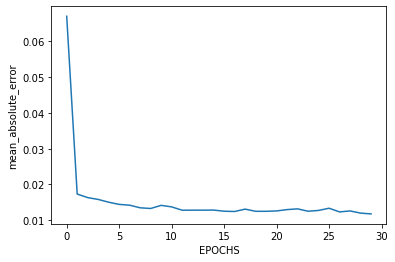

In [92]:
loss_per_epoch = model.history.history['mean_absolute_error']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('EPOCHS')
plt.ylabel('mean_absolute_error')
plt.savefig('DATASET TRE COLONNE mean absolute error BUONO.png')

In [93]:
from datetime import datetime
a = [5,10,20,30]
minutes = []
for i in a:
    start_time = datetime.now()
    model.fit(X, y, epochs=i, batch_size=64)
    end_time = datetime.now()
    minutes.append(end_time - start_time)

Train on 3856 samples
Epoch 1/5
3856/3856 [==============================] - 2s 458us/sample - loss: 2.7506e-04 - mean_absolute_error: 0.0118
Epoch 2/5
3856/3856 [==============================] - 2s 454us/sample - loss: 2.7314e-04 - mean_absolute_error: 0.0118
Epoch 3/5
3856/3856 [==============================] - 2s 457us/sample - loss: 2.9755e-04 - mean_absolute_error: 0.0124
Epoch 4/5
3856/3856 [==============================] - 2s 479us/sample - loss: 2.8994e-04 - mean_absolute_error: 0.0122
Epoch 5/5
3856/3856 [==============================] - 2s 450us/sample - loss: 2.7168e-04 - mean_absolute_error: 0.0118
Train on 3856 samples
Epoch 1/10
3856/3856 [==============================] - 2s 455us/sample - loss: 3.3048e-04 - mean_absolute_error: 0.0132
Epoch 2/10
3856/3856 [==============================] - 2s 448us/sample - loss: 2.5938e-04 - mean_absolute_error: 0.0115
Epoch 3/10
3856/3856 [==============================] - 2s 449us/sample - loss: 2.5525e-04 - mean_absolute_error: 

In [94]:
epochs = [5,10,20,30]

df_epoch = pd.DataFrame(data={'Epoch':epochs},index=minutes)
df_epoch

Epoch
0 days 00:00:08.888265      5
0 days 00:00:19.385269     10
0 days 00:00:38.308174     20
0 days 00:01:01.723015     30

In [95]:
time_sec = []
for i in df_epoch.index:
    a = i.total_seconds()
    time_sec.append(a)

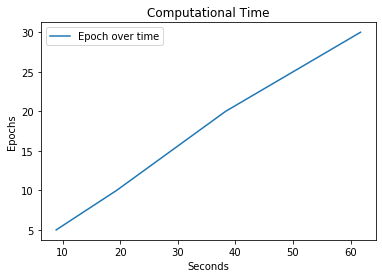

In [96]:
plt.plot(time_sec, epochs)
plt.xlabel('Seconds')
plt.ylabel('Epochs')
plt.title('Computational Time')
plt.legend(['Epoch over time'])
plt.savefig('DATASET TRE COLONNE epochs vs time.png')

In [97]:
## SCELGO 30 EPOCHS (poco tempo computazionale)

In [98]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [100]:
model.fit(X, y, epochs=30, batch_size=64)

Train on 3856 samples
Epoch 1/30
3856/3856 [==============================] - 6s 1ms/sample - loss: 0.0173 - mean_absolute_error: 0.0761
Epoch 2/30
3856/3856 [==============================] - 2s 506us/sample - loss: 6.1765e-04 - mean_absolute_error: 0.0186
Epoch 3/30
3856/3856 [==============================] - 2s 506us/sample - loss: 5.3207e-04 - mean_absolute_error: 0.0172
Epoch 4/30
3856/3856 [==============================] - 2s 519us/sample - loss: 5.0045e-04 - mean_absolute_error: 0.0165
Epoch 5/30
3856/3856 [==============================] - 2s 565us/sample - loss: 4.5586e-04 - mean_absolute_error: 0.0157
Epoch 6/30
3856/3856 [==============================] - 2s 502us/sample - loss: 4.2446e-04 - mean_absolute_error: 0.0150
Epoch 7/30
3856/3856 [==============================] - 2s 536us/sample - loss: 3.9012e-04 - mean_absolute_error: 0.0143
Epoch 8/30
3856/3856 [==============================] - 2s 510us/sample - loss: 3.6415e-04 - mean_absolute_error: 0.0138
Epoch 9/30
3856/

In [101]:
inputs = dataset_total[len(dataset_total)-len(df_test)-5:].values
inputs.shape

(1661, 3)

In [102]:
inputs = scaler.transform(inputs)

In [103]:
X_test = []
for i in range(5,len(inputs)):
    X_test.append(inputs[i-5:i, :])

In [104]:
X_test = np.array(X_test)

In [105]:
test_predictions5 = model.predict(X_test)

In [106]:
forecast_copies = np.repeat(test_predictions5, df_scaled.shape[1], axis=-1)
y_pre5 = scaler.inverse_transform(forecast_copies)[:,0]  
y_pre5

array([119.96151 , 120.541245, 120.129776, ..., 134.04042 , 134.03656 ,
       133.58894 ], dtype=float32)

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


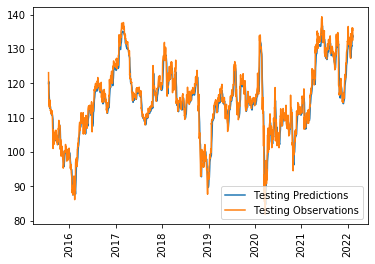

In [136]:
plt.plot(df_test.index, y_pre5)
plt.plot(df_test.index, y_test)
plt.xticks(rotation=90)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.savefig('Tre Col.png')

In [108]:
test_results5 = pd.DataFrame(data={'Test Predictions':y_pre5, 'Actuals':y_test},index=df_test.index)
test_results5

Test Predictions     Actuals
Date                                    
2015-07-20        119.961510  123.133705
2015-07-21        120.541245  115.918549
2015-07-22        120.129776  113.985054
2015-07-23        118.909943  114.966019
2015-07-24        117.222206  113.558517
...                      ...         ...
2022-02-07        133.133011  135.606552
2022-02-08        133.827362  135.389175
2022-02-09        134.040421  136.149994
2022-02-10        134.036560  133.520004
2022-02-11        133.588943  132.690002

[1656 rows x 2 columns]

In [109]:
rmse5=np.sqrt(np.mean(((test_results5['Test Predictions']- test_results5['Actuals'])**2)))
mae5 = np.mean(np.abs(test_results5['Test Predictions']-test_results5['Actuals']))
MAPE5 = np.mean(np.abs(((test_results5['Test Predictions']-test_results5['Actuals'])/test_results5['Actuals'])*100))
from sklearn.metrics import r2_score
r2_5 = r2_score(test_results5['Actuals'], test_results5['Test Predictions'])
rmse5, mae5, MAPE5, r2_5

(2.7084526199304797, 2.01816635776833, 1.772636244381668, 0.9320838307938013)

In [110]:
prezzo = []
for i in test_results5['Actuals']:
    prezzo.append(i)

strategy_act=[]
i=1
while i < len(prezzo):
    if prezzo[i]>prezzo[i-1]:
        strategy_act.append(1)
    else:
        strategy_act.append(-1)
    i=i+1

In [111]:
prezzo_pre = []
for i in test_results5['Test Predictions']:
    prezzo_pre.append(i) 

strategy_pre=[]
i=1
while i < len(prezzo_pre):
    if prezzo_pre[i]>prezzo_pre[i-1]:
        strategy_pre.append(1)
    else:
        strategy_pre.append(-1)
    i=i+1

In [112]:
test_results5 = test_results5[1:]

In [121]:
test_results5

Test Predictions     Actuals  Strategy Pre  Strategy Act
Date                                                                
2015-07-20        119.961510  123.133705             1             0
2015-07-21        120.541245  115.918549             0             0
2015-07-22        120.129776  113.985054             0             1
2015-07-23        118.909943  114.966019             0             0
2015-07-24        117.222206  113.558517             0             0
...                      ...         ...           ...           ...
2022-02-04        132.488449  135.517609             1             1
2022-02-07        133.133011  135.606552             1             0
2022-02-08        133.827362  135.389175             1             1
2022-02-09        134.040421  136.149994             0             0
2022-02-10        134.036560  133.520004             0             0

[1655 rows x 4 columns]

In [114]:
test_results5['Strategy Pre'] = strategy_pre

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
test_results5['Strategy Act'] = strategy_act

/Users/schisanoluca/opt/anaconda3/envs/Dataprediction/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_results5['Strategy Act'], test_results5['Strategy Pre'])
cm

array([[371, 420],
       [419, 445]])

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(test_results5['Strategy Act'], test_results5['Strategy Pre']))
print(precision_score(test_results5['Strategy Act'], test_results5['Strategy Pre']))
print(recall_score(test_results5['Strategy Act'], test_results5['Strategy Pre']))

0.4930513595166163
0.5144508670520231
0.5150462962962963
